## Importing Modules/Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Loading the Dataset

In [7]:
df=pd.read_csv('winequality-red.csv')

In [8]:
# Sneak Peek into the Dataset

df.head()

# Conclusion:

# All the columns are combined into 1 colum and All the datapoints are also combine into 1.
# Before we move to next step we need to clean the dataset into more understandable and meaninfull data.

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


## Cleaning the Dataset

In [10]:
df.columns

Index(['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'], dtype='object')

In [11]:
# Seperating the Columns

columns=df.columns.tolist() # Using to list to convert the column into a list

s=columns[0].replace('"','') # Removing the excess " 
col=s.split(';')     # Split the data int


In [12]:
# Seperating the Rows

rows =df['fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"'].tolist()

data_points=[]
for i in rows:
    data_points.append(str(i).split(';'))

# data_pinnts
    

In [13]:
new_dataset=pd.DataFrame(data_points,columns=col)

In [14]:
data=new_dataset


In [15]:
# Datatypes of the columns

data.dtypes

# All the Columns are of object even though the values are of float type 

fixed acidity           object
volatile acidity        object
citric acid             object
residual sugar          object
chlorides               object
free sulfur dioxide     object
total sulfur dioxide    object
density                 object
pH                      object
sulphates               object
alcohol                 object
quality                 object
dtype: object

In [16]:
# Converting the datatypes of the dataset

data=data.astype('float')


In [17]:
# Chaning the Target Column(Quality) into categorical.

def categorical(quality):
    if int(quality)<=5:
        return 'low'
    else:
        return 'high'

data['quality']=data['quality'].apply(categorical)

In [18]:
data

# Conclusion:
# Now the data is cleaned for EDA and Model Building

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,low
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,low
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,low
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,high
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,low
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,low
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,high
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,high
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,low


## EDA (Exploratory Data Analysis)

### Understaing the dataset

In [21]:
# Number of Columns and Rows

data.shape

# There are 1599 Rows and 12 Columns

(1599, 12)

In [22]:
# Info on the Dataset

data.info()

# Conclusion:
# All the 12 columns are of float data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [23]:
# Peek into the dataset

data.head()

# Conclusion:
# Dataset looks Clean with expected value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,low
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,low
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,low


In [24]:
# Checking NullVlaues

data.isnull().sum()

# There are no Null present in the dataset.

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [26]:
# Checking Duplicates in the dataset

data.duplicated().sum()

# There are 240 duplicates in the dataset.


240

In [32]:
# Drop Duplicates

data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [38]:
data.shape

# The number Rows are 1359 and Columns are 12 After droping the duplicates

(1359, 12)

In [42]:
# Checking the balance of dataset

data['quality'].value_counts()

# In the dataset the high qulity datapoints are more while compared to low quality datapoints.
# The difference is low compared to the whole datapoints.
# high=53.3% , low=46.7%, diff=6.6%
# So the dataset is fairyly balanced

quality
high    719
low     640
Name: count, dtype: int64

In [46]:
# Descriptive Statistics

data.describe()

# Conclusion:

# fixed acidity: Avg ~ 8.31, range 4.6 to 15.9

# volatile acidity: Avg ~ 0.53, range 0.12 to 1.58

# citric acid: Avg ~ 0.27, range 0.00 to 1.00

# residual sugar: Avg ~ 2.52, range 0.9 to 15.5

# chlorides: Avg ~ 0.088, range 0.012 to 0.611

# free sulfur dioxide: Avg ~ 15.89, range 1 to 72

# total sulfur dioxide: Avg ~ 46.83, range 6 to 289

# density: Avg ~ 0.9967, range 0.99007 to 1.00369

# pH: Avg ~ 3.31, range 2.74 to 4.01

# sulphates: Avg ~ 0.66, range 0.33 to 2.00

# alcohol: Avg ~ 10.43, range 8.4 to 14.9

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


#### Understanding the Columns:

In [49]:
#| Feature                  | Description                               | Low Quality (≤5) | High Quality (>5) | Insight                                      |
#| ------------------------ | ----------------------------------------- | ---------------- | ----------------- | -------------------------------------------- |
#| **fixed acidity**        | Tartaric acid (non-volatile)              | 6.5 – 10.5       | 5.5 – 9.0         | Overlapping; not a strong differentiator     |
#| **volatile acidity**     | Acetic acid (vinegar taste)               | 0.5 – 1.5        | 0.1 – 0.6         | 🔻 Lower is better (less sour)               |
#| **citric acid**          | Adds freshness and flavor                 | 0.0 – 0.4        | 0.3 – 0.7         | 🔺 Higher is better (adds complexity)        |
#| **residual sugar**       | Leftover sugar after fermentation         | 1.0 – 3.5        | 1.0 – 3.0         | Overlapping; not strongly related to quality |
#| **chlorides**            | Salt concentration                        | 0.06 – 0.15      | 0.03 – 0.08       | 🔻 Lower is better (less salty)              |
#| **free sulfur dioxide**  | SO₂ available to prevent spoilage         | 1 – 35           | 5 – 45            | Mild increase in high quality                |
#| **total sulfur dioxide** | Total SO₂ (free + bound)                  | 40 – 200         | 20 – 140          | 🔻 Slightly lower in high quality            |
#| **density**              | Related to sugar & alcohol content        | 0.995 – 1.003    | 0.990 – 0.997     | 🔻 Lower density = better wine (often)       |
#| **pH**                   | Inverse of acidity (low pH = more acidic) | 2.9 – 3.7        | 3.0 – 3.5         | Overlaps; weak indicator                     |
#| **sulphates**            | Adds bitterness & acts as preservative    | 0.3 – 0.8        | 0.5 – 1.2         | 🔺 Higher is better (more stable wine)       |
#| **alcohol**              | Ethanol % in wine                         | 8.0 – 10.5%      | 10.0 – 14.0%      | 🔺 Strongest quality predictor               |

### Conclusion:

### Univariate analysis

#### Bins function

In [57]:
import numpy as np
import pandas as pd

def fd_bins(series):
    """
    Calculates the number of histogram bins using the Freedman–Diaconis rule.

    Parameters:
    - series: pd.Series (numeric column)

    Returns:
    - int: optimal number of bins
    """

    # Drop missing values
    data = series.dropna()
    
    # Calculate IQR
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    
    # Get data range
    data_range = data.max() - data.min()
    
    # Sample size
    n = len(data)
    
    # Avoid division by zero
    if IQR == 0 or n == 0:
        return 10  # fallback
    
    # Freedman–Diaconis bin width
    bin_width = 2 * IQR / (n ** (1/3))
    
    # Number of bins
    bins = int(np.ceil(data_range / bin_width))
    
    return bins


In [59]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

#### fixed acidity column:

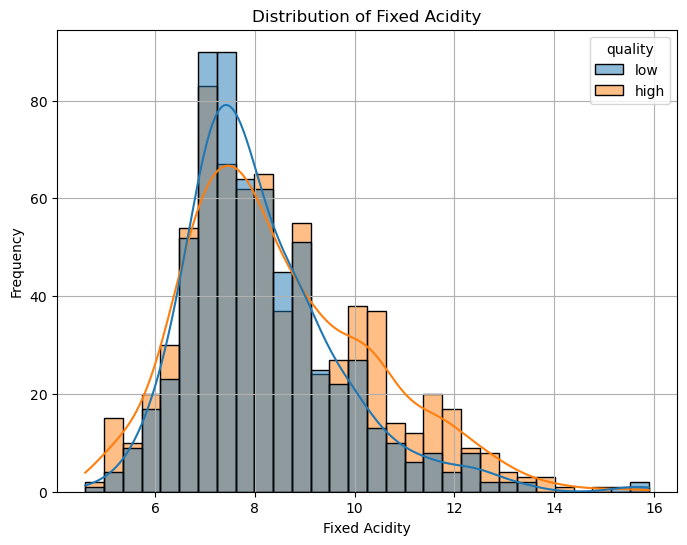

In [62]:
# Histogram with KDE

bins=fd_bins(data['fixed acidity'])
plt.figure(figsize=(8, 6))
sns.histplot(data=data,x='fixed acidity', kde=True, bins=bins,hue='quality',color='skyblue', edgecolor='black')
plt.title('Distribution of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Conlcusion:
# More number of data points are lies in the range of 6-9 
# For the plot we can say that it is moderatly right skewed.

In [63]:
data['fixed acidity'].skew()

0.9410413664561449

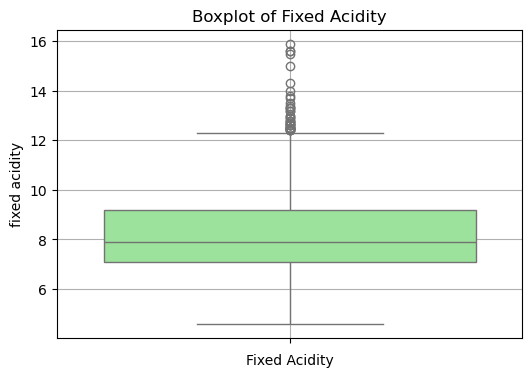

In [64]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['fixed acidity'], color='lightgreen')
plt.title('Boxplot of Fixed Acidity')
plt.xlabel('Fixed Acidity')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

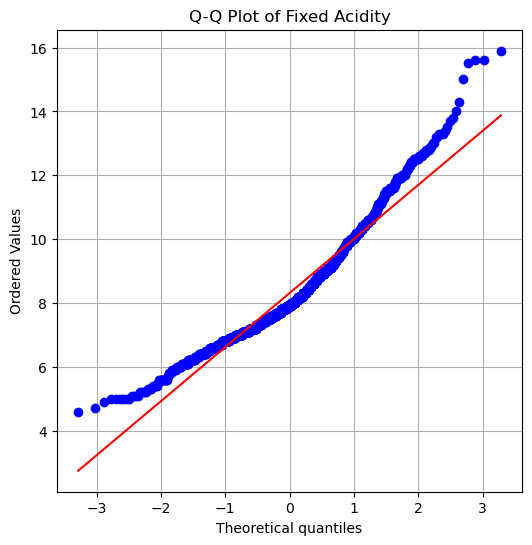

In [65]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['fixed acidity'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Fixed Acidity')
plt.grid(True)
plt.show()

# Conclusion:

# The Fixed Acidity coulumn may not be in Guassin Distriubution

In [66]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['fixed acidity'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# The Fixed Acidity coulumn may not be in Guassin Distriubution


H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:



#### volatile acidity column:

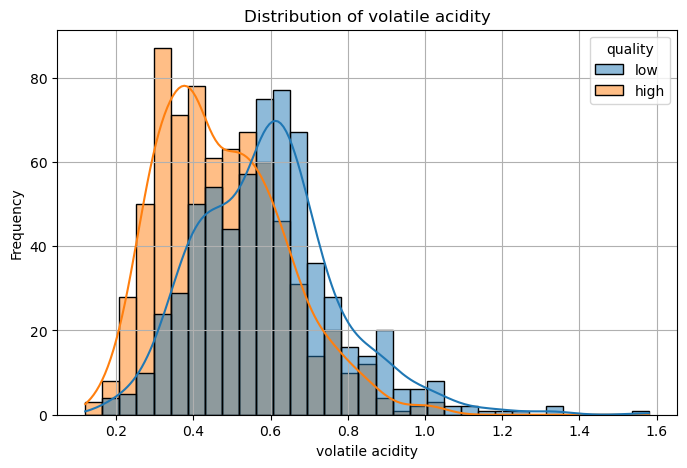

In [73]:
# Histogram with KDE

bins=fd_bins(data['volatile acidity'])
plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='volatile acidity', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of volatile acidity')
plt.xlabel('volatile acidity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [75]:
data['volatile acidity'].skew()

0.7292789463991854

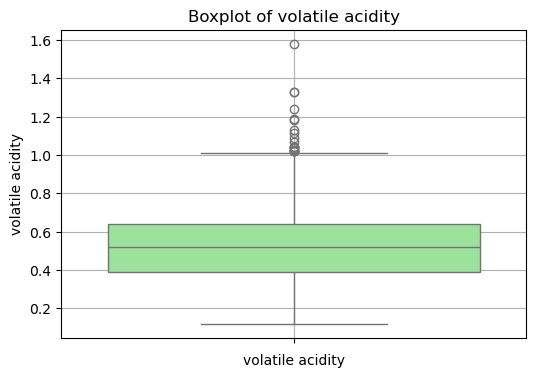

In [76]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['volatile acidity'], color='lightgreen')
plt.title('Boxplot of volatile acidity')
plt.xlabel('volatile acidity')
plt.grid(True)
plt.show()


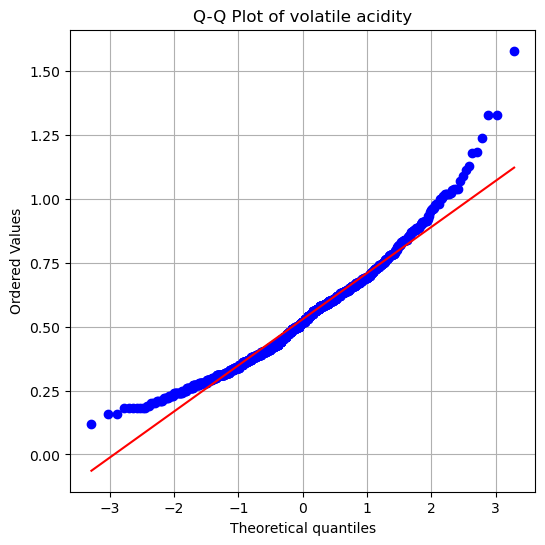

In [77]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['volatile acidity'], dist="norm", plot=plt)
plt.title('Q-Q Plot of volatile acidity')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [78]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['volatile acidity'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution


H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:

#### citric acid column:

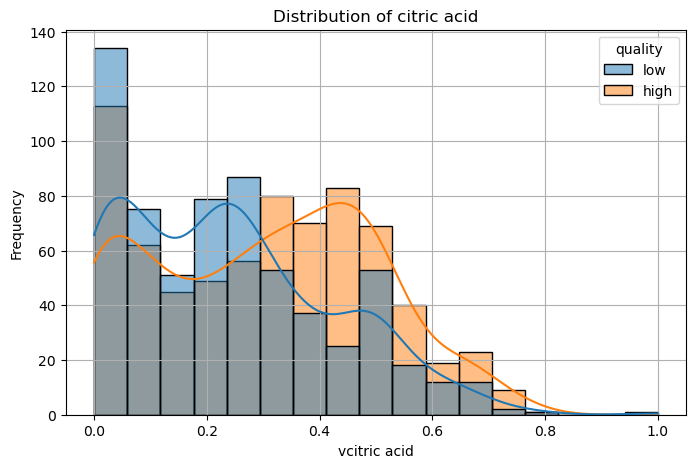

In [84]:
# Histogram with KDE

bins=fd_bins(data['citric acid'])

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='citric acid', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of citric acid')
plt.xlabel('vcitric acid')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [87]:
data['citric acid'].skew()

0.31272554238899036

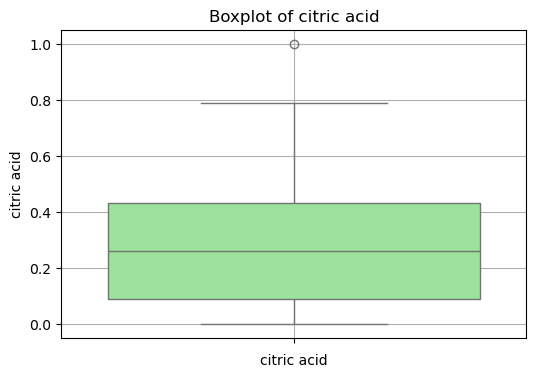

In [88]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['citric acid'], color='lightgreen')
plt.title('Boxplot of citric acid')
plt.xlabel('citric acid')
plt.grid(True)
plt.show()

# Conclusion:
# There are outliers present in the column.

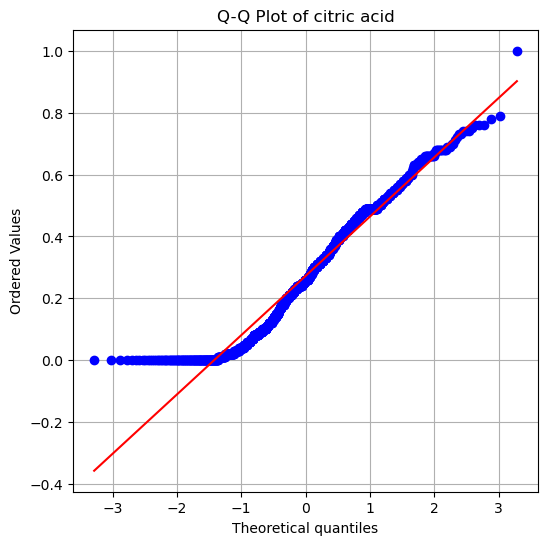

In [89]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['citric acid'], dist="norm", plot=plt)
plt.title('Q-Q Plot of citric acid')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [90]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['citric acid'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution


H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion

#### residual sugar column:

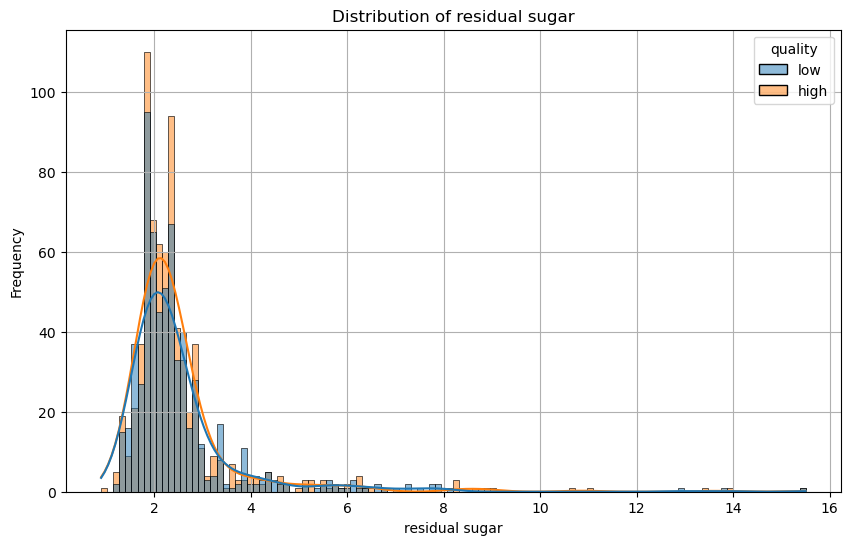

In [96]:
# Histogram with KDE

bins=fd_bins(data['residual sugar'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='residual sugar', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of residual sugar')
plt.xlabel('residual sugar')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()



In [97]:
data['residual sugar'].skew()

4.548153403940447

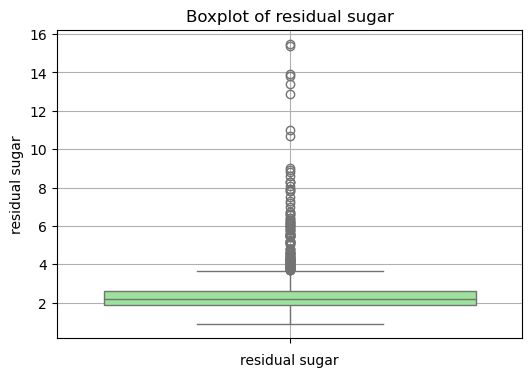

In [98]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['residual sugar'], color='lightgreen')
plt.title('Boxplot of residual sugar')
plt.xlabel('residual sugar')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

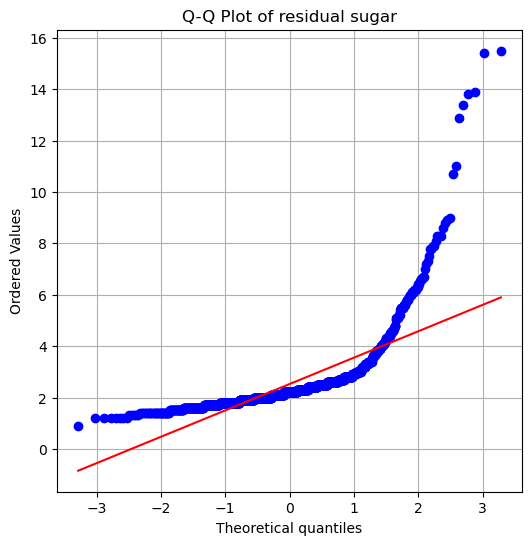

In [101]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['residual sugar'], dist="norm", plot=plt)
plt.title('Q-Q Plot of residual sugar')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [102]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['residual sugar'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:

#### chlorides column:

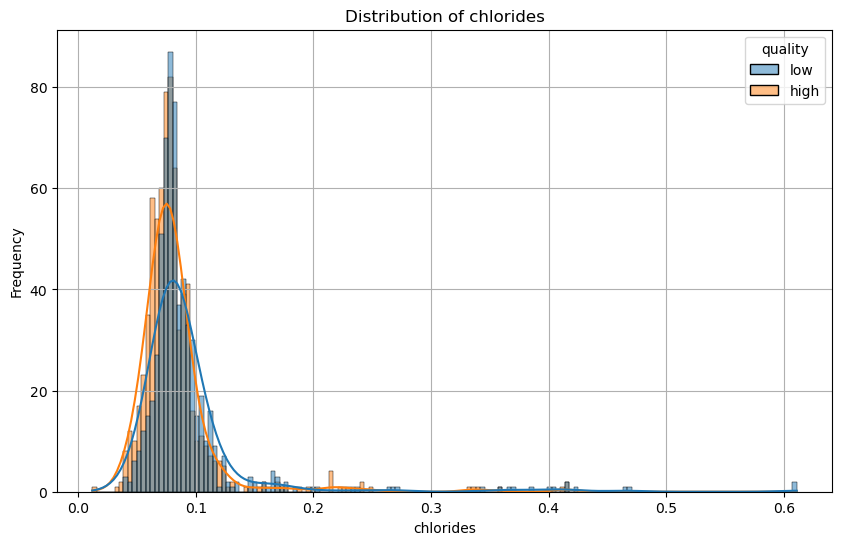

In [105]:
# Histogram with KDE

bins=fd_bins(data['chlorides'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='chlorides', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of chlorides')
plt.xlabel('chlorides')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [106]:
data['chlorides'].skew()

5.502487294623722

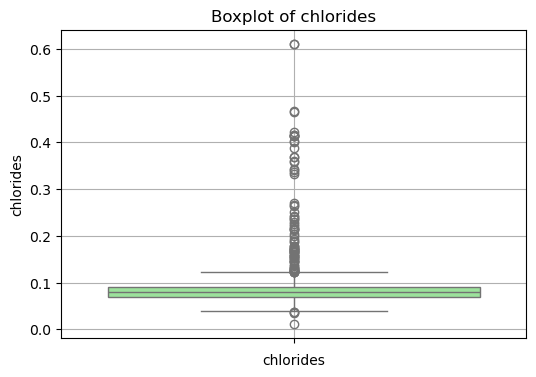

In [108]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['chlorides'], color='lightgreen')
plt.title('Boxplot of chlorides')
plt.xlabel('chlorides')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

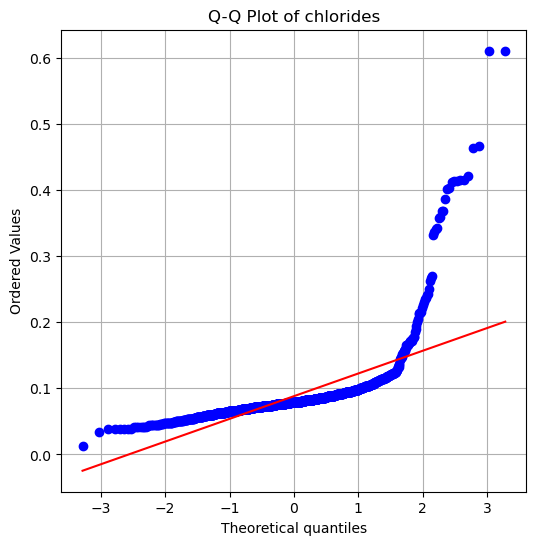

In [110]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['chlorides'], dist="norm", plot=plt)
plt.title('Q-Q Plot of chlorides')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [112]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['chlorides'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion

#### free sulfur dioxide column:

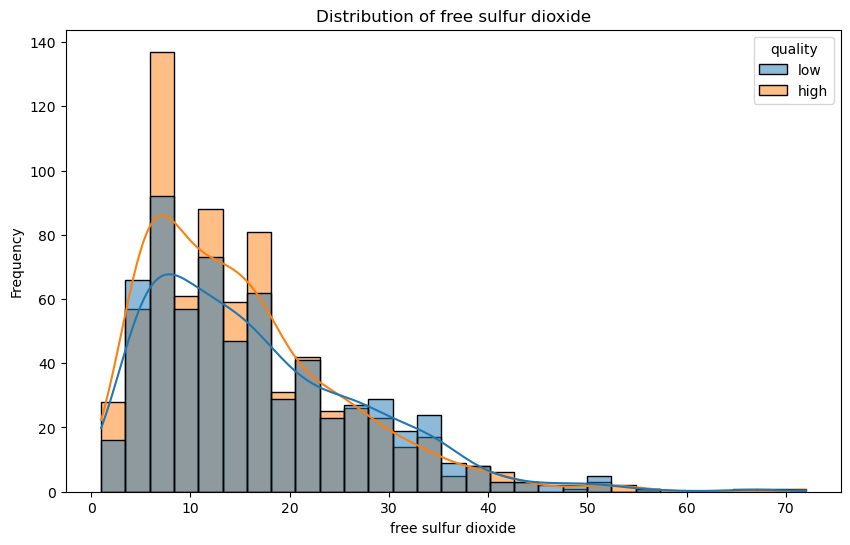

In [117]:
# Histogram with KDE

bins=fd_bins(data['free sulfur dioxide'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='free sulfur dioxide', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of free sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.ylabel('Frequency')
#plt.grid(True)
plt.show()

In [118]:
data['free sulfur dioxide'].skew()

1.2265794991760643

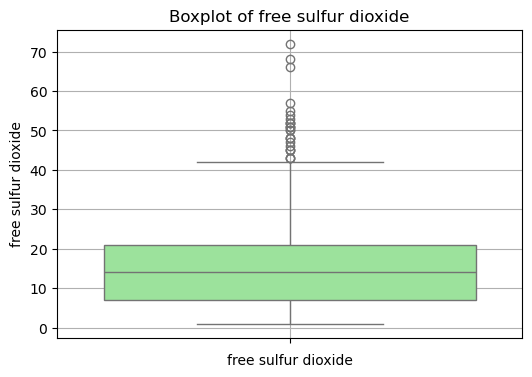

In [119]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['free sulfur dioxide'], color='lightgreen')
plt.title('Boxplot of free sulfur dioxide')
plt.xlabel('free sulfur dioxide')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

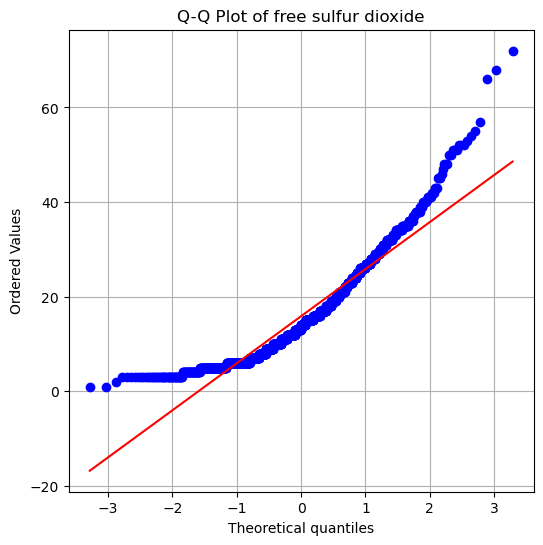

In [120]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['free sulfur dioxide'], dist="norm", plot=plt)
plt.title('Q-Q Plot of free sulfur dioxide')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [121]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['free sulfur dioxide'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:

#### total sulfur dioxide

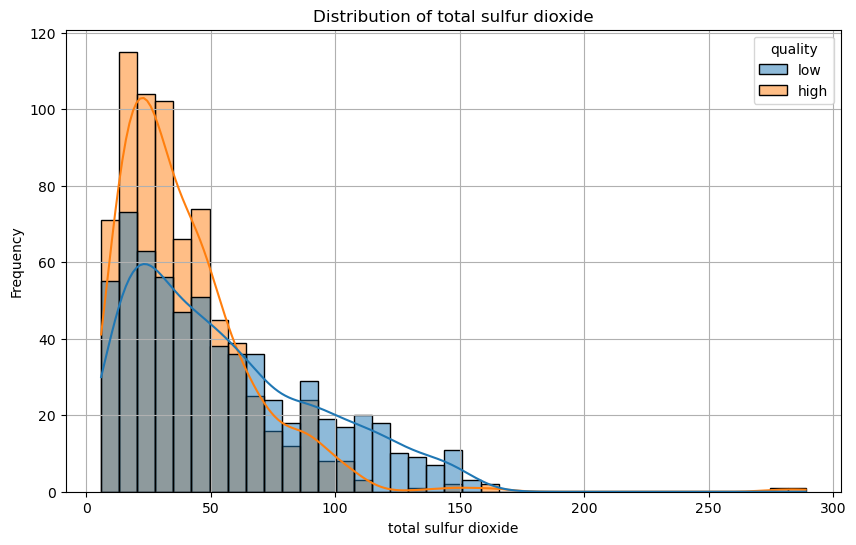

In [132]:
# Histogram with KDE

bins=fd_bins(data['total sulfur dioxide'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='total sulfur dioxide', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of total sulfur dioxide')
plt.xlabel('total sulfur dioxide')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [135]:
data['total sulfur dioxide'].skew()

1.5403680777213933

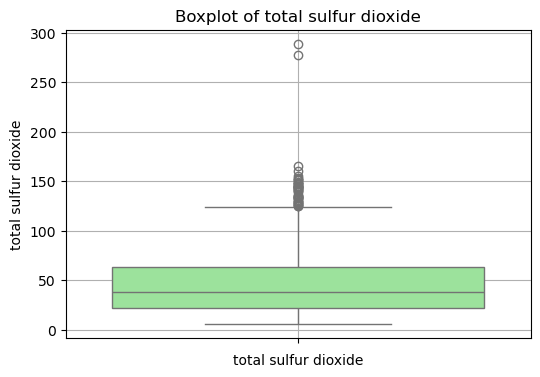

In [138]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['total sulfur dioxide'], color='lightgreen')
plt.title('Boxplot of total sulfur dioxide')
plt.xlabel('total sulfur dioxide')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

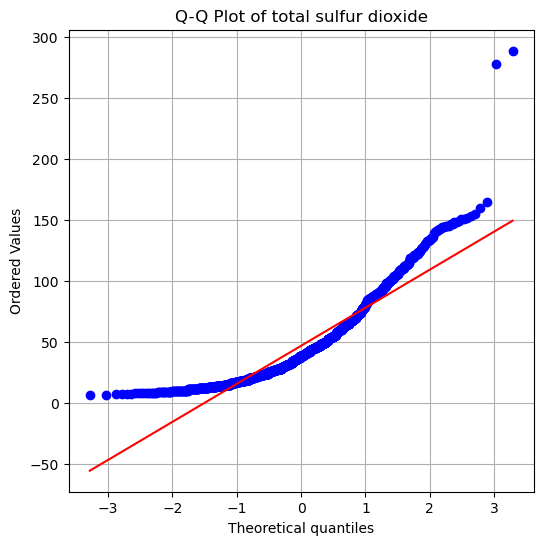

In [140]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['total sulfur dioxide'], dist="norm", plot=plt)
plt.title('Q-Q Plot of total sulfur dioxide')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [141]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['total sulfur dioxide'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:

#### density column:

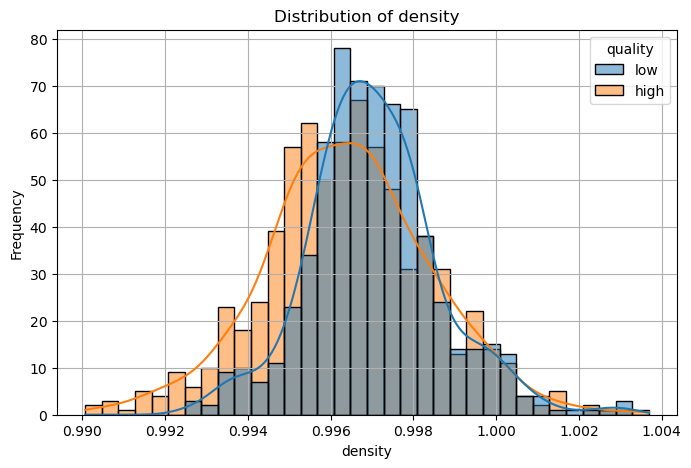

In [146]:
# Histogram with KDE

bins=fd_bins(data['density'])

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='density', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of density')
plt.xlabel('density')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [147]:
data['density'].skew()

0.04477785573116107

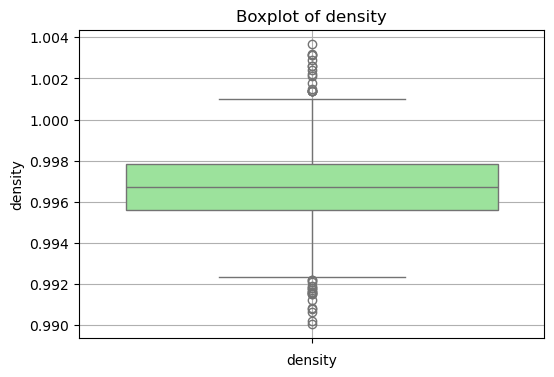

In [148]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['density'], color='lightgreen')
plt.title('Boxplot of density')
plt.xlabel('density')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

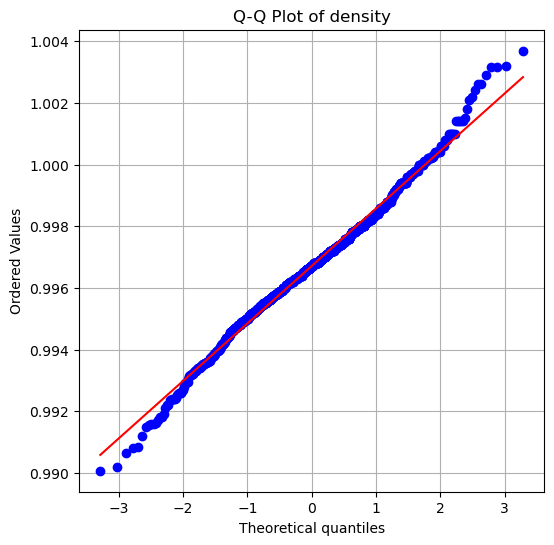

In [149]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['density'], dist="norm", plot=plt)
plt.title('Q-Q Plot of density')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may be in Guassin Distriubution

In [150]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the age is following Gussian distribution
#     Alternate_hypothesis(H1): age is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['density'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion

#### pH column:

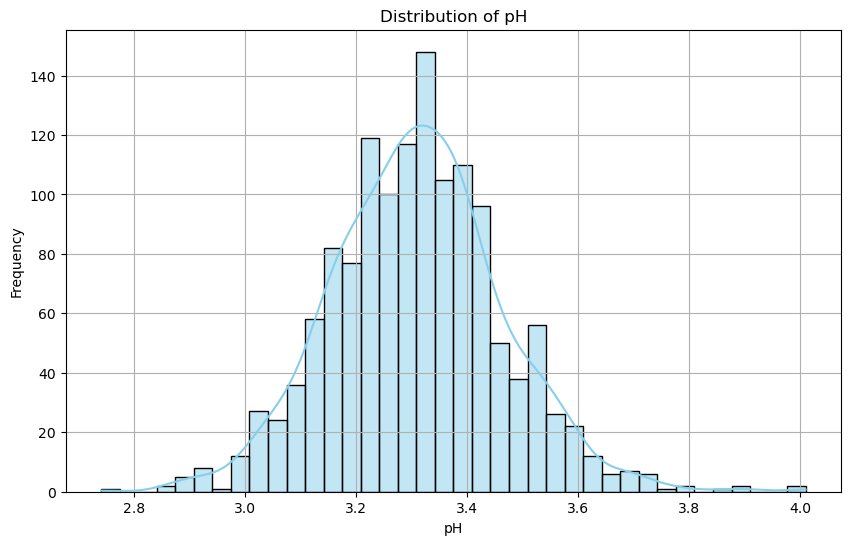

In [158]:
# Histogram with KDE

bins=fd_bins(data['pH'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='pH', kde=True, bins=bins, color='skyblue', edgecolor='black')
plt.title('Distribution of pH')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [160]:
data['pH'].skew()

0.2320322752014824

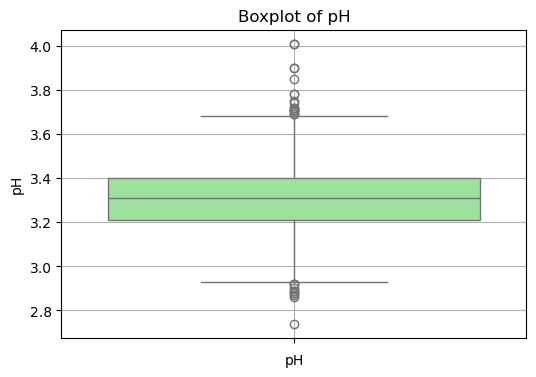

In [162]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['pH'], color='lightgreen')
plt.title('Boxplot of pH')
plt.xlabel('pH')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

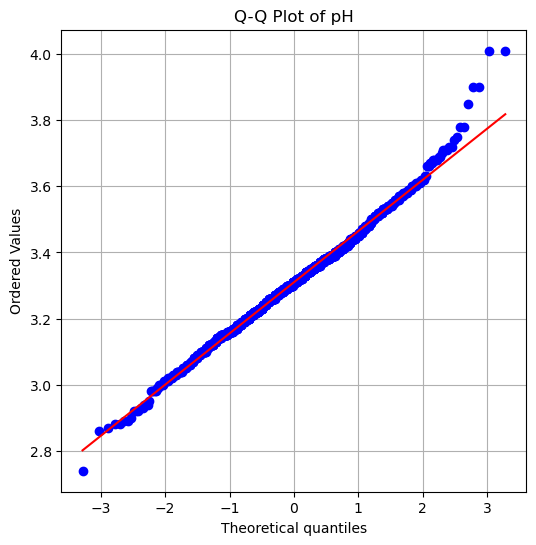

In [163]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['pH'], dist="norm", plot=plt)
plt.title('Q-Q Plot of pH')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may be in Guassin Distriubution

In [165]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): the column is following Gussian distribution
#     Alternate_hypothesis(H1): column is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['pH'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion:

#### sulphates column:

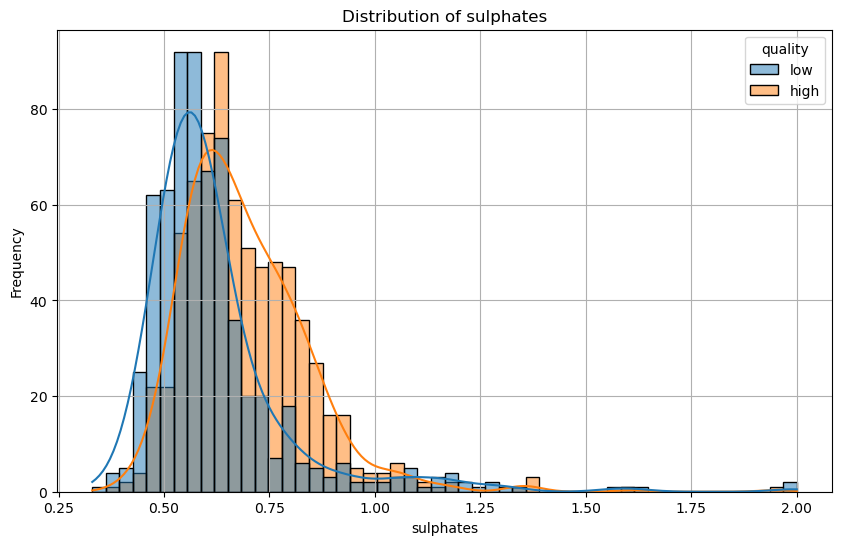

In [170]:
# Histogram with KDE

bins=fd_bins(data['sulphates'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='sulphates', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of sulphates')
plt.xlabel('sulphates')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [171]:
# Skeweness
print(data['sulphates'].skew())

2.4065046145674196


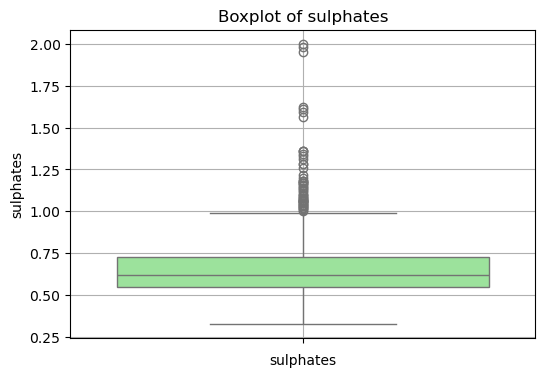

In [172]:
# BoxPlot 
plt.figure(figsize=(6, 4))
sns.boxplot(data['sulphates'], color='lightgreen')
plt.title('Boxplot of sulphates')
plt.xlabel('sulphates')
plt.grid(True)
plt.show()

# Conclusion:
# There are outliers present in this column

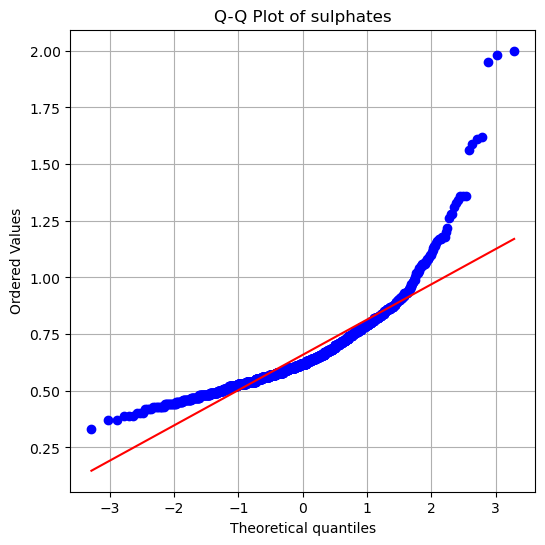

In [173]:
# QQ-Plot
plt.figure(figsize=(6, 6))
stats.probplot(data['sulphates'], dist="norm", plot=plt)
plt.title('Q-Q Plot of sulphates')
plt.grid(True)
plt.show()

# Conclusion:
# This column may not be in Guassian Distribution

In [176]:
# AD Test
# Hypothesis:
#     Null_hypothesis(H0): the column is following Gussian distribution
#     Alternate_hypothesis(H1): column is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['sulphates'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')


# Conclusion:
# This column may not be in Guassian Distribution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion

#### alcohol

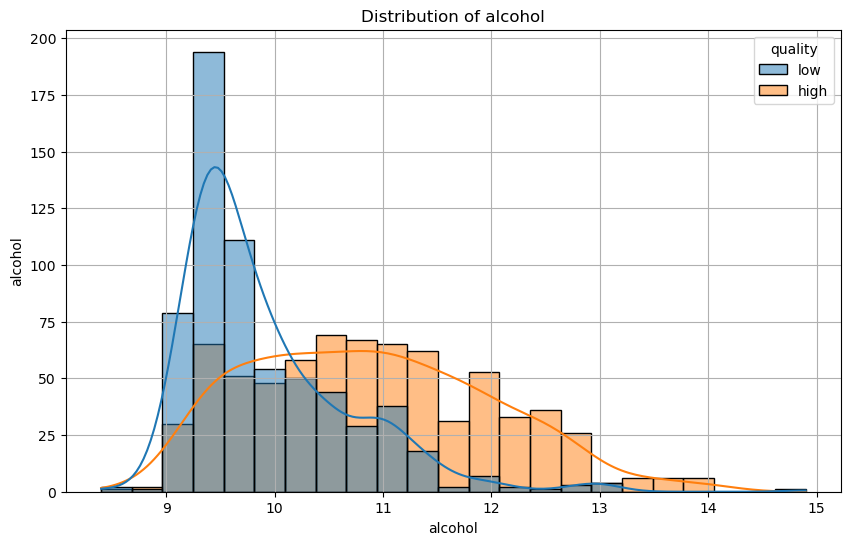

In [182]:
# Histogram with KDE

bins=fd_bins(data['alcohol'])

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='alcohol', kde=True, bins=bins,hue='quality', color='skyblue', edgecolor='black')
plt.title('Distribution of alcohol')
plt.xlabel('alcohol')
plt.ylabel('alcohol')
plt.grid(True)
plt.show()

In [184]:
# Skewness

data['alcohol'].skew()

0.8598411692032926

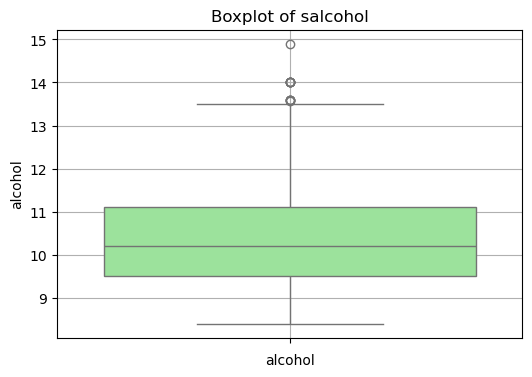

In [186]:
# BoxPlot 

plt.figure(figsize=(6, 4))
sns.boxplot(data['alcohol'], color='lightgreen')
plt.title('Boxplot of salcohol')
plt.xlabel('alcohol')
plt.grid(True)
plt.show()

# Conclusion:
# there are outliers present in the column.

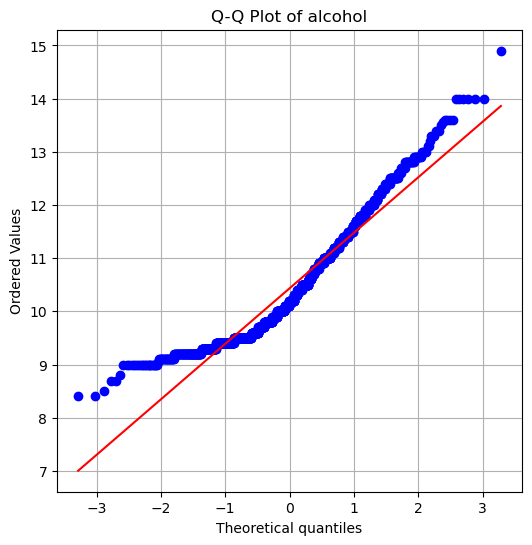

In [187]:
# QQ-Plot

plt.figure(figsize=(6, 6))
stats.probplot(data['alcohol'], dist="norm", plot=plt)
plt.title('Q-Q Plot of alcohol')
plt.grid(True)
plt.show()

# Conclusion:

# This coulumn may not be in Guassin Distriubution

In [189]:
# AD Test

# Hypothesis:
#     Null_hypothesis(H0): column is following Gussian distribution
#     Alternate_hypothesis(H1): column is not following Gussian Distribution


# Perform AD test
stat_val,crit_values,sign_values=stats.anderson(data['alcohol'],dist='norm')

for i in crit_values:
    if stat_val>i:
        print('H0 is reject : which means the column may not be in Guassian Distribution')
        break
else:
    print('H0 is accepted : which means the coumn may be in Guassian Distribution')
        
# Conclusion
# This coulumn may not be in Guassin Distriubution

H0 is reject : which means the column may not be in Guassian Distribution


#### Conclusion

### Conclusion on Univariate analysis

### Outliers Handling

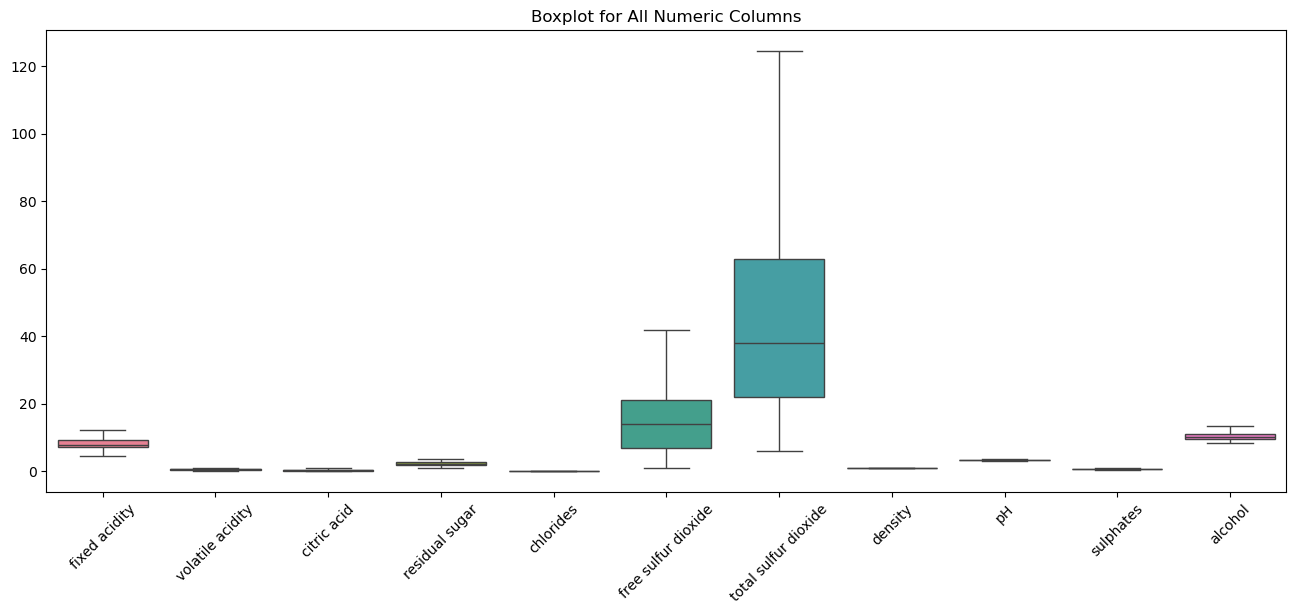

In [195]:
# Since every numerical have outliers and Non-Guassian we can use IQR method for imputing the outliers

def Outliers_handling(data,columns):
    for col in columns:
        q3=np.percentile(data[col],75)
        q1=np.percentile(data[col],25)
        IQR=q3-q1
        lower_bound=q1-(1.5*IQR)
        upper_bound=q3+(1.5*IQR)
        data[col]=data[col].clip(lower=lower_bound,upper=upper_bound)
    return data


numeric_cols=data.select_dtypes(include=['number']).columns
data=Outliers_handling(data,numeric_cols)

plt.figure(figsize=(16,6))
sns.boxplot(data=data)
plt.title("Boxplot for All Numeric Columns")
plt.xticks(rotation=45)
plt.show()

### Encoding:


In [197]:
# Since the target column is classified into two we can use label encoder.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['quality_encoded'] = le.fit_transform(data['quality'])

### Bivariate analysis

#### Heat map

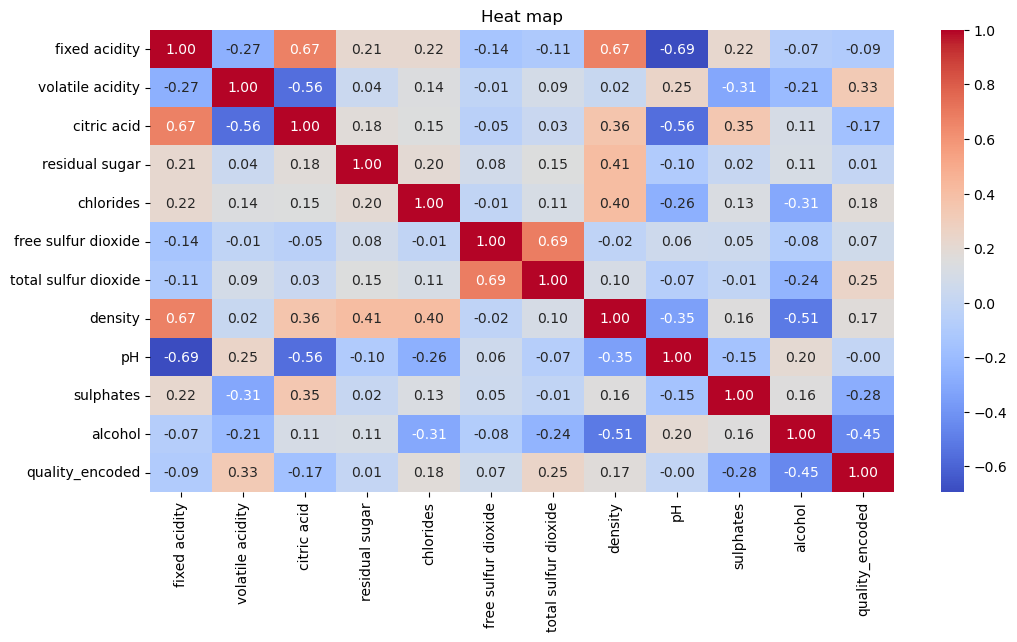

In [201]:
num_col=data.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map')
plt.show()

#### Conclusion

####  Alcohol vs Quality

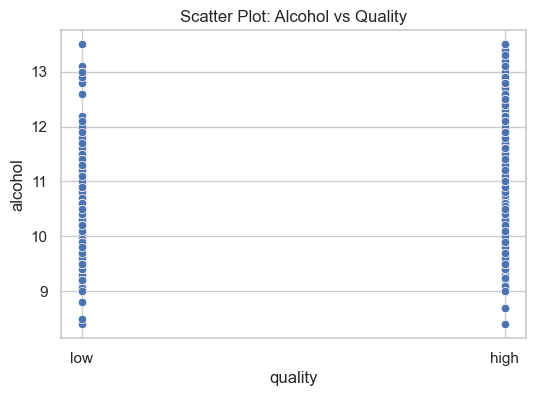

In [205]:
# Scatter plot


sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
plt.title("Scatter Plot: Alcohol vs Quality")
sns.scatterplot(data=data, x='quality', y='alcohol')
plt.show()

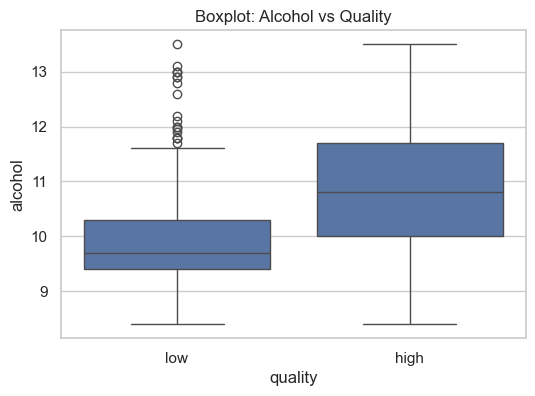

In [213]:
# Box-Plot

sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
plt.title("Boxplot: Alcohol vs Quality")
sns.boxplot(data=data, x='quality', y='alcohol')
plt.show()

#### Conclusion

#### Volatile Acidity vs Quality

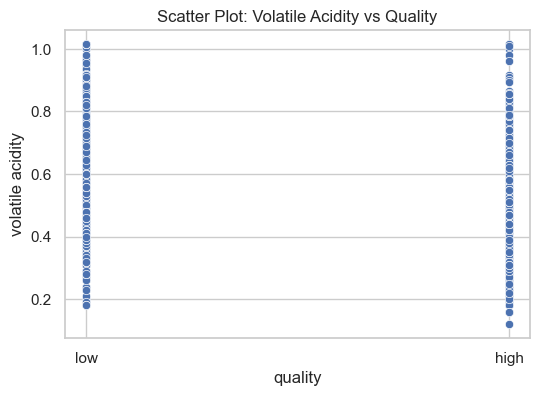

In [217]:
# ScatterPlot

plt.figure(figsize=(6, 4))
plt.title("Scatter Plot: Volatile Acidity vs Quality")
sns.scatterplot(data=data, x='quality', y='volatile acidity')
plt.show()

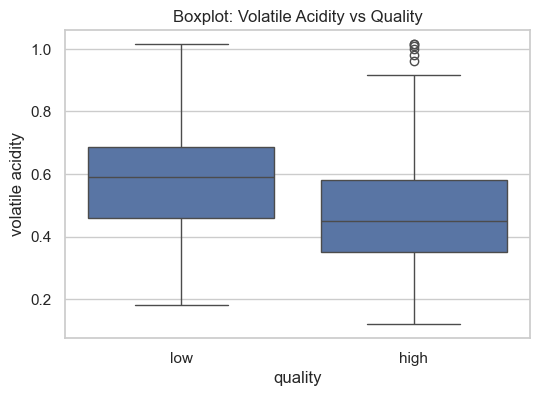

In [219]:
# Box-Plot

plt.figure(figsize=(6, 4))
plt.title("Boxplot: Volatile Acidity vs Quality")
sns.boxplot(data=data, x='quality', y='volatile acidity')
plt.show()

#### Conlcusion

####  Sulphates vs Quality

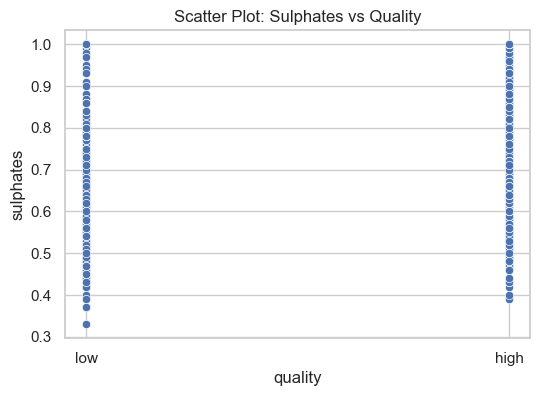

In [223]:
# Scatter Plot

plt.figure(figsize=(6, 4))
plt.title("Scatter Plot: Sulphates vs Quality")
sns.scatterplot(data=data, x='quality', y='sulphates')
plt.show()

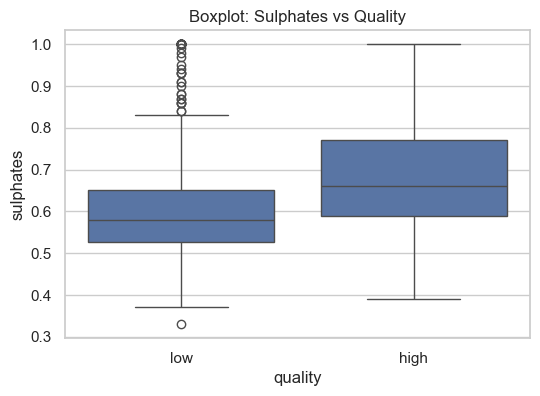

In [225]:
# Box-Plot

plt.figure(figsize=(6, 4))
plt.title("Boxplot: Sulphates vs Quality")
sns.boxplot(data=data, x='quality', y='sulphates')
plt.show()

#### Conclusion

#### Citric Acid vs Quality 

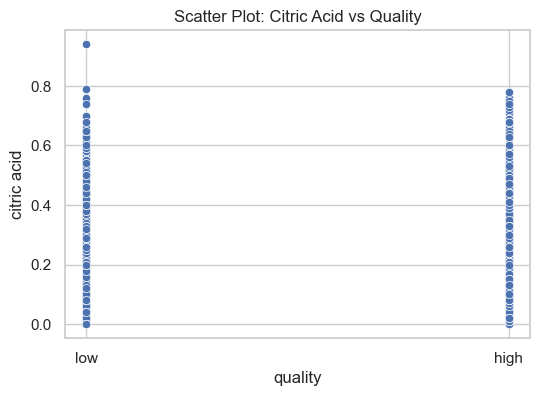

In [229]:
# Scatter Plot

plt.figure(figsize=(6, 4))
plt.title("Scatter Plot: Citric Acid vs Quality")
sns.scatterplot(data=data, x='quality', y='citric acid')
plt.show()

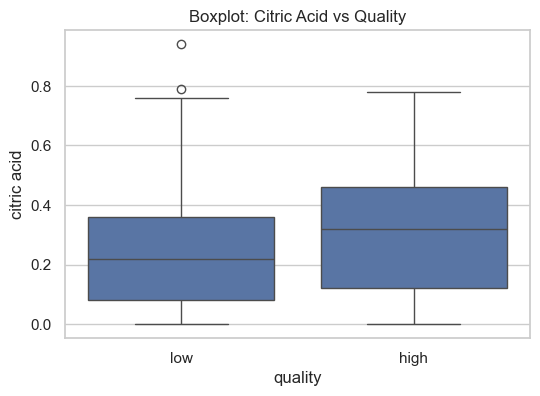

In [230]:
# Box-Plot

plt.figure(figsize=(6, 4))
plt.title("Boxplot: Citric Acid vs Quality")
sns.boxplot(data=data, x='quality', y='citric acid')
plt.show()

#### Conlcusion

### Overall conclusion on Bivariate analysis

### Multivariate analysis:


#### Heat map

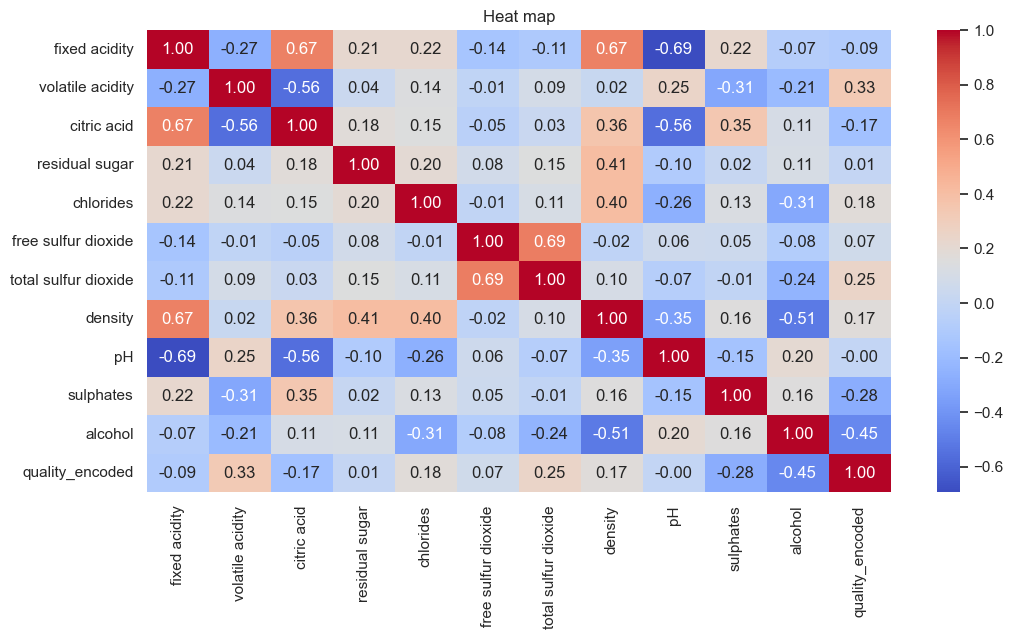

In [237]:
# Heat map

num_col=data.select_dtypes(include=['number'])

plt.figure(figsize=(12,6))
sns.heatmap(num_col.corr(),annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heat map')
plt.show()

#### Conclusion:


####  Fixed Acidity and Citric Acid

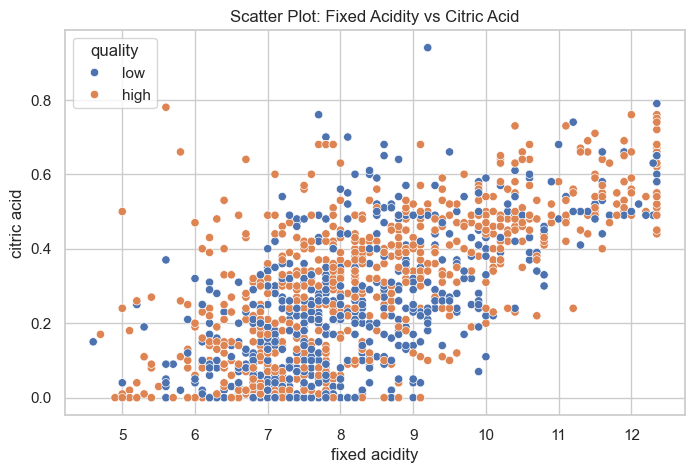

In [275]:
# Scatter Plot

plt.figure(figsize=(8, 5))
plt.title("Scatter Plot: Fixed Acidity vs Citric Acid")
sns.scatterplot(data=data, x='fixed acidity', y='citric acid', hue='quality')
plt.show()

#### Conclusion

####  Free Sulfur Dioxide and Total Sulfur Dioxide

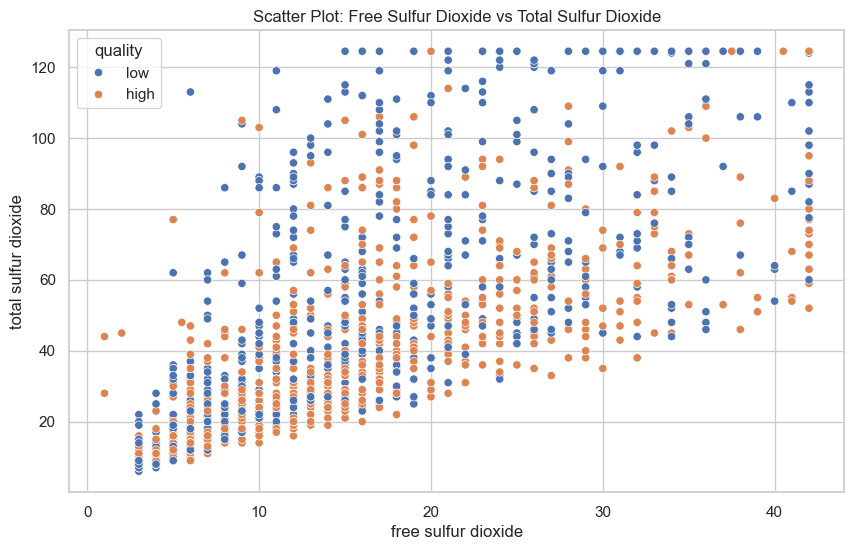

In [279]:
# Scatter Plot

plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Free Sulfur Dioxide vs Total Sulfur Dioxide")
sns.scatterplot(data=data, x='free sulfur dioxide', y='total sulfur dioxide', hue='quality')
plt.show()

#### Conclusion

#### Fixed Acidity and pH

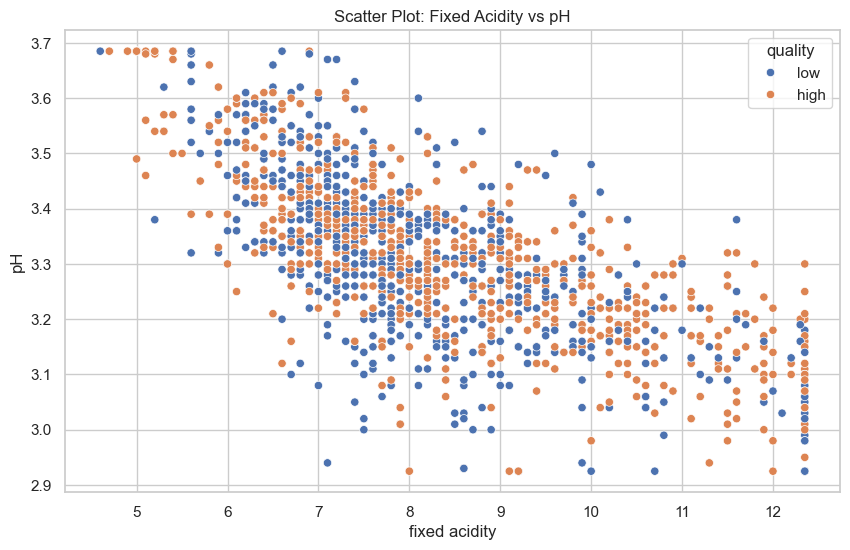

In [281]:
# Scatte Plot

plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Fixed Acidity vs pH")
sns.scatterplot(data=data, x='fixed acidity', y='pH', hue='quality')
plt.show()

#### Conclusion

#### Alcohol and Density

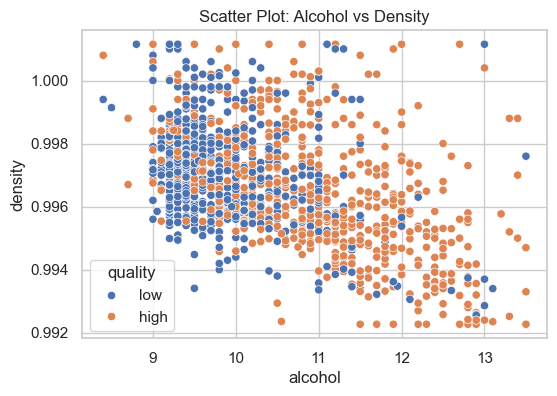

In [285]:
# Scatter Plot

plt.figure(figsize=(6,4))
plt.title("Scatter Plot: Alcohol vs Density")
sns.scatterplot(data=data, x='alcohol', y='density', hue='quality')
plt.show()

#### Conlcusion

#### Volatile Acidity and Citric Acid

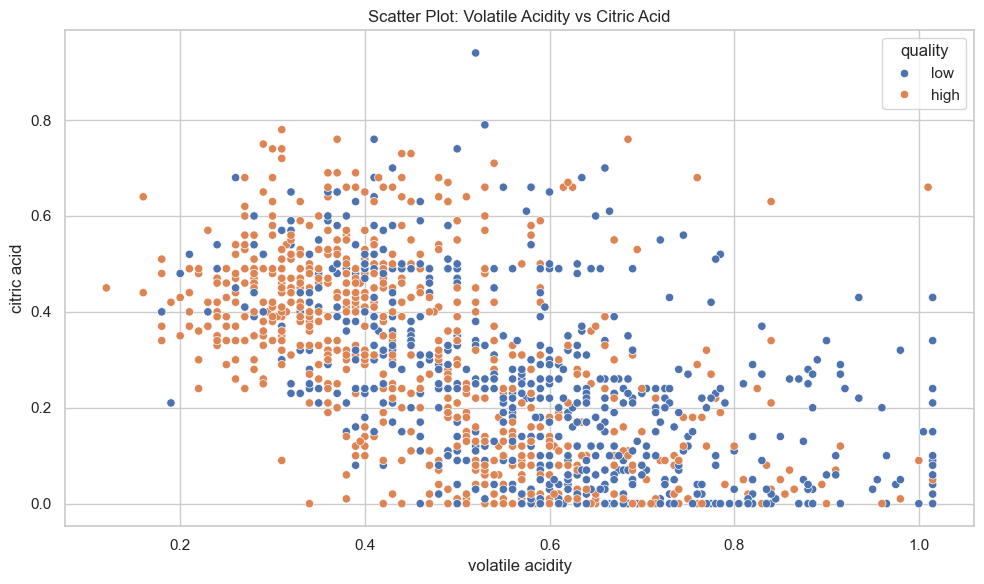

In [293]:
# Scatter Plot
plt.figure(figsize=(10, 6))
plt.title("Scatter Plot: Volatile Acidity vs Citric Acid")
sns.scatterplot(data=data, x='volatile acidity', y='citric acid',hue='quality')
plt.tight_layout()
plt.show()

#### Conclusion

#### Sulphates vs Chlorides vs Volatile Acidity

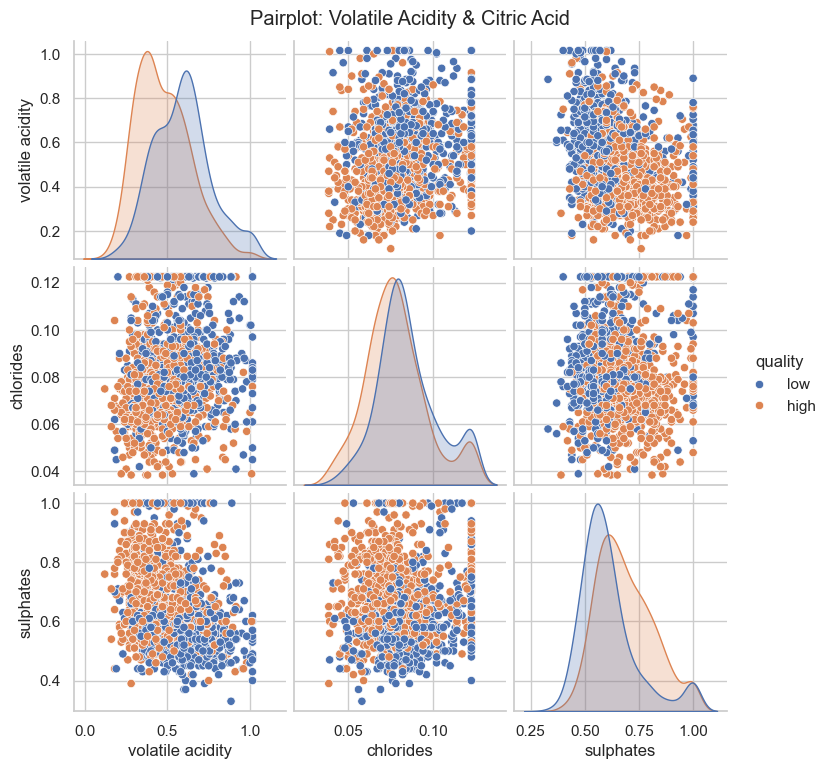

In [262]:
# Pair Plot

sns.pairplot(data, vars=['volatile acidity', 'chlorides','sulphates'], hue='quality')
plt.suptitle("Pairplot: Volatile Acidity & Citric Acid", y=1.02)
plt.show()

#### Conlcusion

### Overall Conclusin on Mulitvariate analysis

## Feature Engineering

### Feature Selection:

In [311]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd

# Prepare features and target
X = data.drop(['quality_encoded','quality'], axis=1)
y = data['quality_encoded']

# Apply SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Store and display results
scores = pd.DataFrame({'Feature': X.columns, 'F-Score': selector.scores_})
scores = scores.sort_values(by='F-Score', ascending=False).reset_index()
print(scores)


    index               Feature     F-Score
0      10               alcohol  344.003850
1       1      volatile acidity  163.927753
2       9             sulphates  118.127496
3       6  total sulfur dioxide   91.078448
4       4             chlorides   45.010536
5       7               density   40.008995
6       2           citric acid   39.546759
7       0         fixed acidity   12.166846
8       5   free sulfur dioxide    6.683373
9       3        residual sugar    0.036168
10      8                    pH    0.000047


In [315]:
data=data.drop(['free sulfur dioxide','residual sugar','pH','quality_encoded'],axis=1)

KeyError: "['free sulfur dioxide', 'residual sugar', 'pH', 'quality_encoded'] not found in axis"

### Feature Transformation:


In [321]:
def dataset_transfromation(data):
    transformed_data = data.copy()
    features=transformed_data.select_dtypes(include='number').columns

    for col in features:
        skewness = data[col].skew()

        if skewness > 1:
            transformed_data[col] = np.log1p(data[col])
        
        elif 0.5 < skewness <= 1:
            transformed_data[col] = np.sqrt(data[col])
            
        elif skewness < -1:
            max_val = data[col].max()
            transformed_data[col] = np.log1p(max_val + 1 - data[col])
            
        elif -1 <= skewness < -0.5:
            max_val = data[col].max()
            transformed_data[col] = np.sqrt(max_val - data[col])

    return transformed_data

data=dataset_transfromation(data)


### Feature Scalling:

In [332]:
# Normalizationn(for KNN Classification):
from sklearn.preprocessing import MinMaxScaler
def apply_normalization(data):
    normalized_data = data.copy()
    features=normalized_data.select_dtypes(include='number').columns
    scaler = MinMaxScaler()
    normalized_data[features] = scaler.fit_transform(data[features])
    return normalized_data

data=apply_normalization(data)

### Target encoding

In [336]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['quality'] = le.fit_transform(data['quality'])

##  Model Building

### Train-Test Split

In [342]:
from sklearn.model_selection import train_test_split

X = data.drop('quality', axis=1)   
y = data['quality']                

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Train KNN Model

#### Best K-vlaue

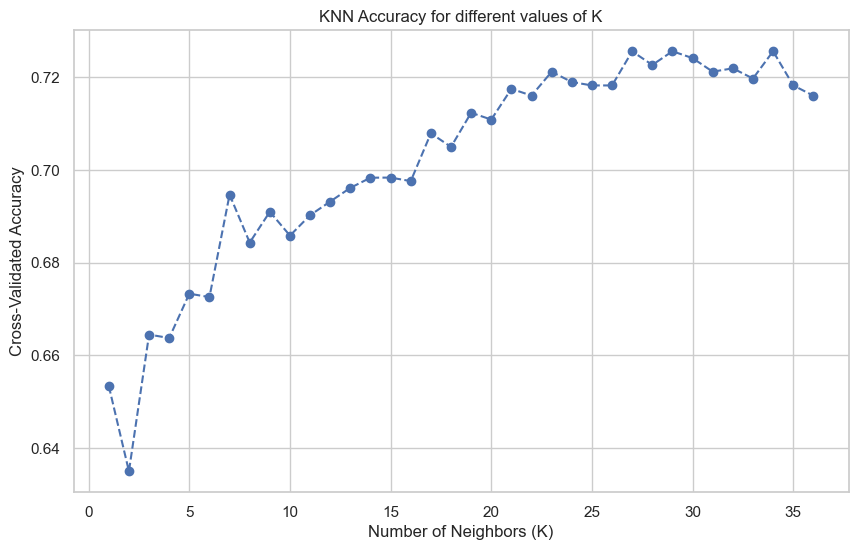

In [447]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_values = list(range(1, 37))  
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=6, scoring='accuracy')  
    cv_scores.append(scores.mean())
    
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--')
plt.title('KNN Accuracy for different values of K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validated Accuracy')
plt.grid(True)
plt.show()

best_k = k_values[cv_scores.index(max(cv_scores))]


####  trainging the knn model

In [450]:
knn = KNeighborsClassifier(n_neighbors=best_k,algorithm='kd_tree',weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=34, weights='distance')

###  Evaluate the model

In [476]:
knn.score(X_test, y_test)

0.7830882352941176